# Car_Price_Prediction
___

# Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
ds_cars = pd.read_csv('/kaggle/input/cars-dataset/2. Cars Data1.csv')
ds_cars

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0


# Data Exploration

In [3]:
ds_cars.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [4]:
ds_cars.tail()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0
431,Volvo,XC70,Wagon,Europe,All,"$35,145","$33,112",2.5,5.0,208.0,20.0,27.0,3823.0,109.0,186.0


In [5]:
ds_cars.sample(10)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
246,Mazda,Mazda3 s 4dr,Sedan,Asia,Front,"$17,200","$15,922",2.3,4.0,160.0,25.0,31.0,2762.0,104.0,179.0
255,Mercedes-Benz,G500,SUV,Europe,All,"$76,870","$71,540",5.0,8.0,292.0,13.0,14.0,5423.0,112.0,186.0
21,Audi,TT 1.8 convertible 2dr (coupe),Sports,Europe,Front,"$35,940","$32,512",1.8,4.0,180.0,20.0,28.0,3131.0,95.0,159.0
105,Chrysler,Crossfire 2dr,Sports,USA,Rear,"$34,495","$32,033",3.2,6.0,215.0,17.0,25.0,3060.0,95.0,160.0
290,Mitsubishi,Endeavor XLS,SUV,Asia,All,"$30,492","$28,330",3.8,6.0,215.0,17.0,21.0,4134.0,109.0,190.0
108,Dodge,Neon SE 4dr,Sedan,USA,Front,"$13,670","$12,849",2.0,4.0,132.0,29.0,36.0,2581.0,105.0,174.0
212,Kia,Spectra 4dr,Sedan,Asia,Front,"$12,360","$11,630",1.8,4.0,124.0,24.0,32.0,2661.0,101.0,178.0
120,Ford,Excursion 6.8 XLT,SUV,USA,All,"$41,475","$36,494",6.8,10.0,310.0,10.0,13.0,7190.0,137.0,227.0
208,Kia,Sorento LX,SUV,Asia,Front,"$19,635","$18,630",3.5,6.0,192.0,16.0,19.0,4112.0,107.0,180.0
374,Suzuki,Forenza EX 4dr,Sedan,Asia,Front,"$15,568","$15,378",2.0,4.0,119.0,22.0,30.0,2756.0,102.0,177.0


In [6]:
ds_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    float64
 10  MPG_City     428 non-null    float64
 11  MPG_Highway  428 non-null    float64
 12  Weight       428 non-null    float64
 13  Wheelbase    428 non-null    float64
 14  Length       428 non-null    float64
dtypes: float64(8), object(7)
memory usage: 50.8+ KB


#### Columns 'MSRP' , 'Invoice' are object type and have strings ($) and (,)

### Remove ($) and (,) signs

In [7]:
ds_cars['MSRP'] = ds_cars['MSRP'].str.replace(',','').str.replace('$','')
ds_cars['Invoice'] = ds_cars['Invoice'].str.replace(',','').str.replace('$','')

In [8]:
ds_cars

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565,38203,2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565,40083,2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210,42573,2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Europe,Front,26135,24641,1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0


In [9]:
ds_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    float64
 10  MPG_City     428 non-null    float64
 11  MPG_Highway  428 non-null    float64
 12  Weight       428 non-null    float64
 13  Wheelbase    428 non-null    float64
 14  Length       428 non-null    float64
dtypes: float64(8), object(7)
memory usage: 50.8+ KB


### Convert columns from object type into float type

In [10]:
ds_cars['MSRP'] = ds_cars['MSRP'].astype(float)
ds_cars['Invoice'] = ds_cars['Invoice'].astype(float)
ds_cars

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565.0,38203.0,2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565.0,40083.0,2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210.0,42573.0,2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Europe,Front,26135.0,24641.0,1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0


In [11]:
ds_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    float64
 6   Invoice      428 non-null    float64
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    float64
 10  MPG_City     428 non-null    float64
 11  MPG_Highway  428 non-null    float64
 12  Weight       428 non-null    float64
 13  Wheelbase    428 non-null    float64
 14  Length       428 non-null    float64
dtypes: float64(10), object(5)
memory usage: 50.8+ KB


In [12]:
pd.options.display.float_format = '{:,.3f}'.format
ds_cars.describe()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000,428.000,428.000,426.000,428.000,428.000,428.000,428.000,428.000,428.000
mean,"32,774.855","30,014.701",3.197,5.808,215.886,20.061,26.843,"3,577.953",108.154,186.362
std,"19,431.717","17,642.118",1.109,1.558,71.836,5.238,5.741,758.983,8.312,14.358
min,"10,280.000","9,875.000",1.300,3.000,73.000,10.000,12.000,"1,850.000",89.000,143.000
25%,"20,334.250","18,866.000",2.375,4.000,165.000,17.000,24.000,"3,104.000",103.000,178.000
50%,"27,635.000","25,294.500",3.000,6.000,210.000,19.000,26.000,"3,474.500",107.000,187.000
75%,"39,205.000","35,710.250",3.900,6.000,255.000,21.250,29.000,"3,977.750",112.000,194.000
max,"192,465.000","173,560.000",8.300,12.000,500.000,60.000,66.000,"7,190.000",144.000,238.000


In [13]:
ds_cars.describe(include=object)

,Make,Model,Type,Origin,DriveTrain
count,428,428,428,428,428
unique,38,425,6,3,3
top,Toyota,G35 4dr,Sedan,Asia,Front
freq,28,2,262,158,226


# Visualization to explore the data

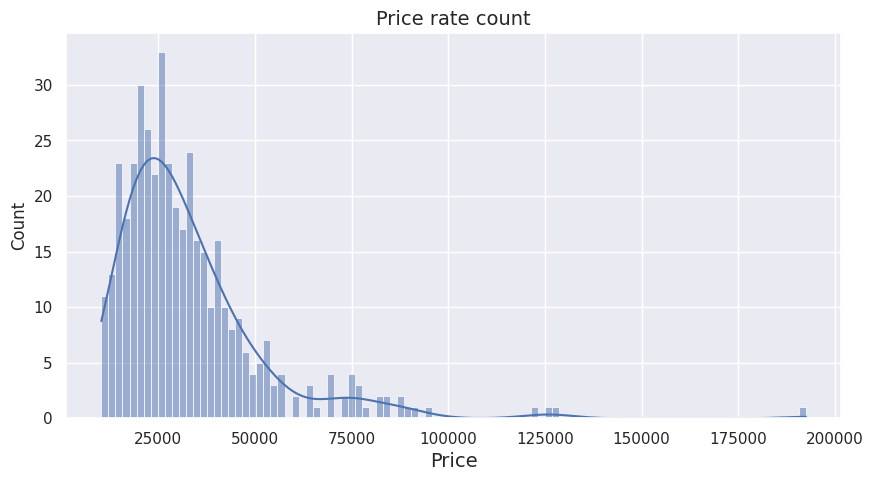

In [14]:
plt.figure(figsize=(10, 5))   
sns.histplot(x='MSRP', data=ds_cars, bins=100, kde=True)  
plt.title('Price rate count', fontsize=14)
plt.xlabel('Price', fontsize=14)
plt.show()

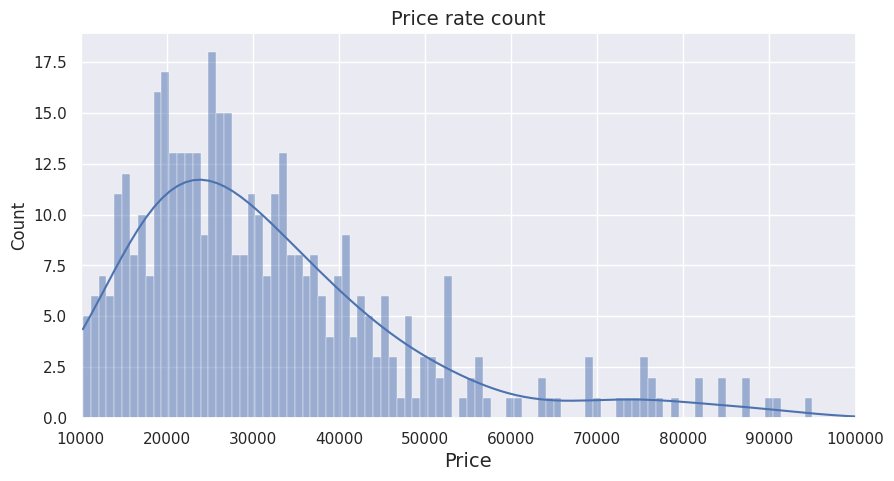

In [15]:
plt.figure(figsize=(10, 5))   
sns.histplot(x='MSRP', data=ds_cars, bins=200, kde=True)  
plt.title('Price rate count', fontsize=14)
plt.xlabel('Price', fontsize=14)
plt.xlim((10000, 100000)) 
plt.show()

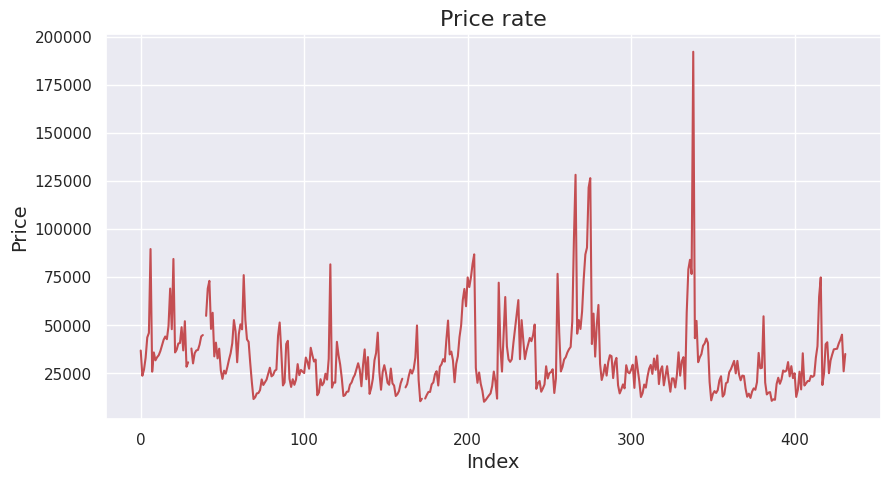

In [16]:
plt.figure(figsize=(10,5))  
plt.plot(ds_cars.index, ds_cars.MSRP, color='r')
plt.title('Price rate', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

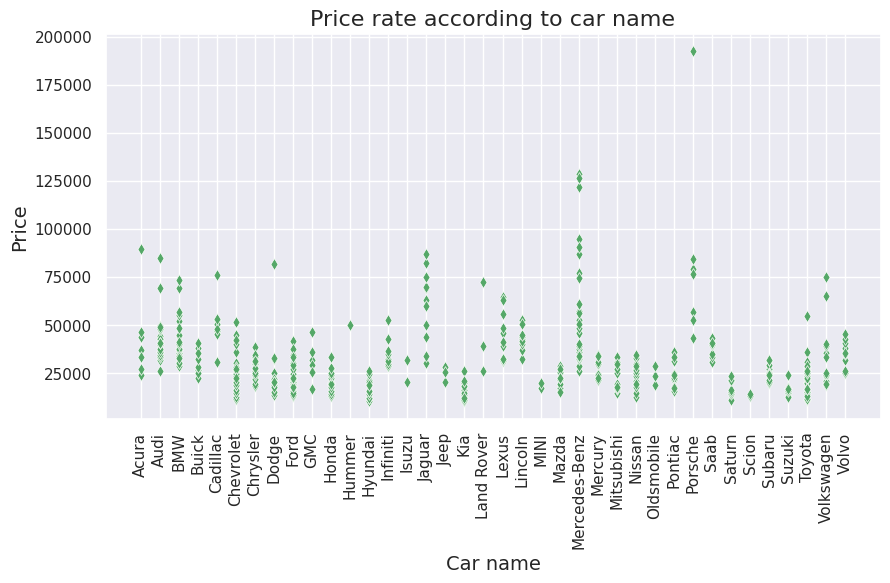

In [17]:
plt.figure(figsize=(10, 5))  
sns.scatterplot(x='Make', y='MSRP', data=ds_cars, marker= 'd' , color='g')
plt.title('Price rate according to car name', fontsize=16)
plt.xlabel('Car name', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=90)
plt.show()

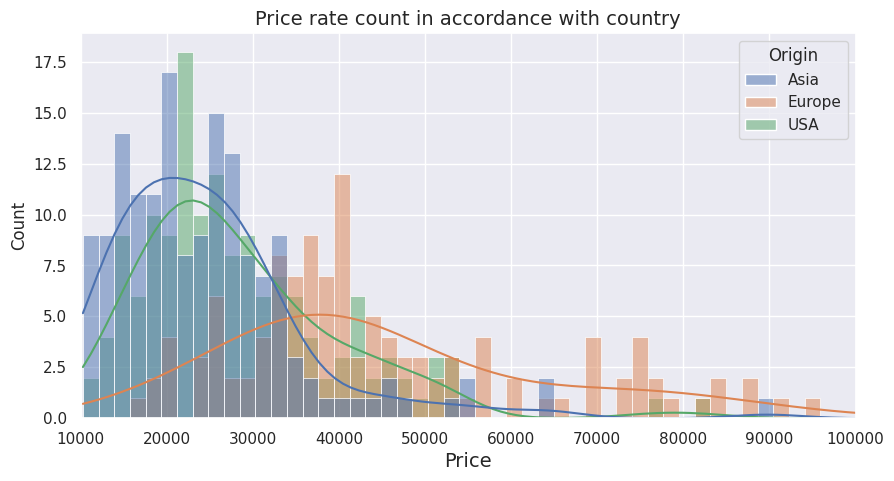

In [18]:
plt.figure(figsize=(10, 5))   
sns.histplot(x='MSRP', data=ds_cars, bins=100, kde=True, hue='Origin')  
plt.title('Price rate count in accordance with country', fontsize=14)
plt.xlabel('Price', fontsize=14)
plt.xlim((10000, 100000)) 
plt.show()

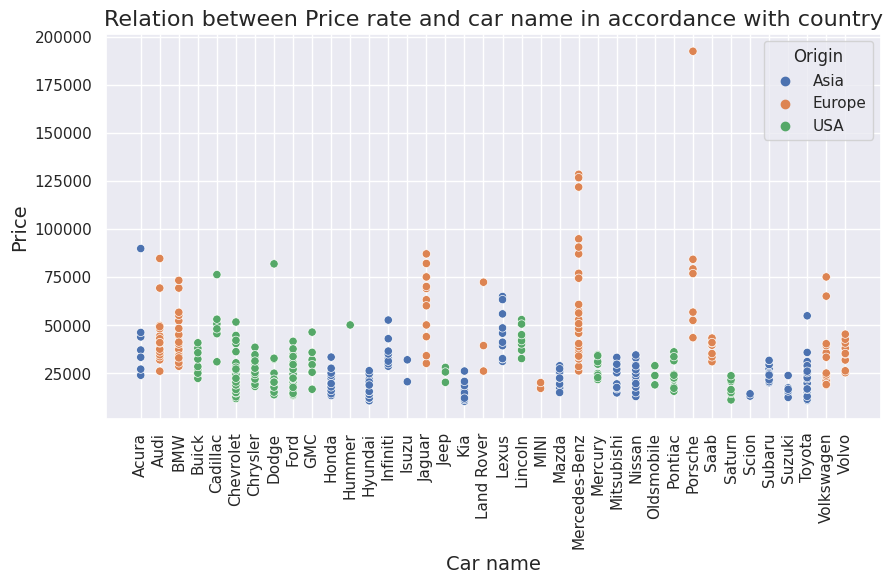

In [19]:
plt.figure(figsize=(10, 5))  
sns.scatterplot(x='Make', y='MSRP', data=ds_cars, marker= 'o' , hue='Origin')
plt.title('Relation between Price rate and car name in accordance with country', fontsize=16)
plt.xlabel('Car name', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=90)
plt.show()

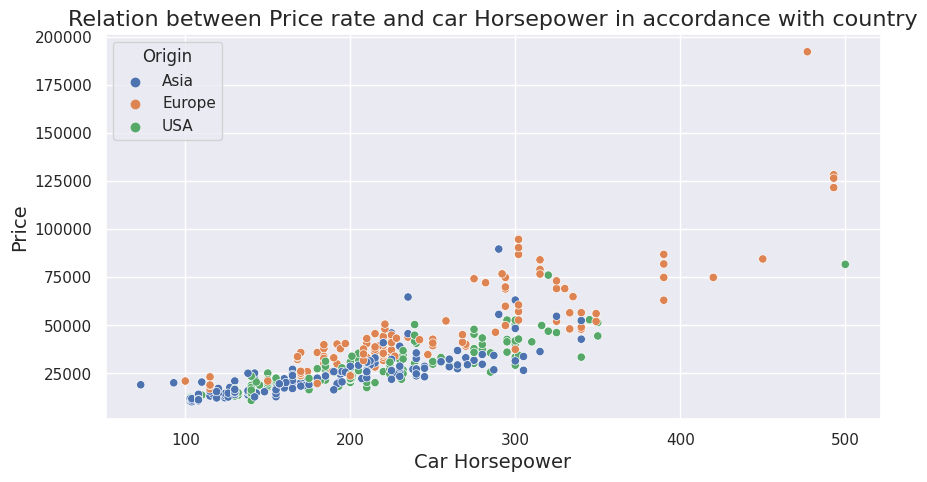

In [20]:
plt.figure(figsize=(10, 5))  
sns.scatterplot(x='Horsepower', y='MSRP', data=ds_cars, marker= 'o' , hue='Origin')
plt.title('Relation between Price rate and car Horsepower in accordance with country', fontsize=16)
plt.xlabel('Car Horsepower', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

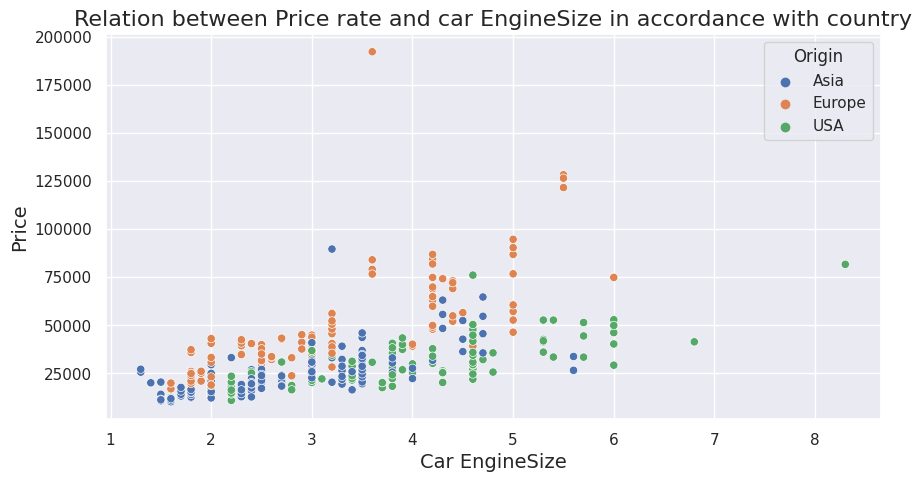

In [21]:
plt.figure(figsize=(10, 5))  
sns.scatterplot(x='EngineSize', y='MSRP', data=ds_cars, marker= 'o' , hue='Origin')
plt.title('Relation between Price rate and car EngineSize in accordance with country', fontsize=16)
plt.xlabel('Car EngineSize', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

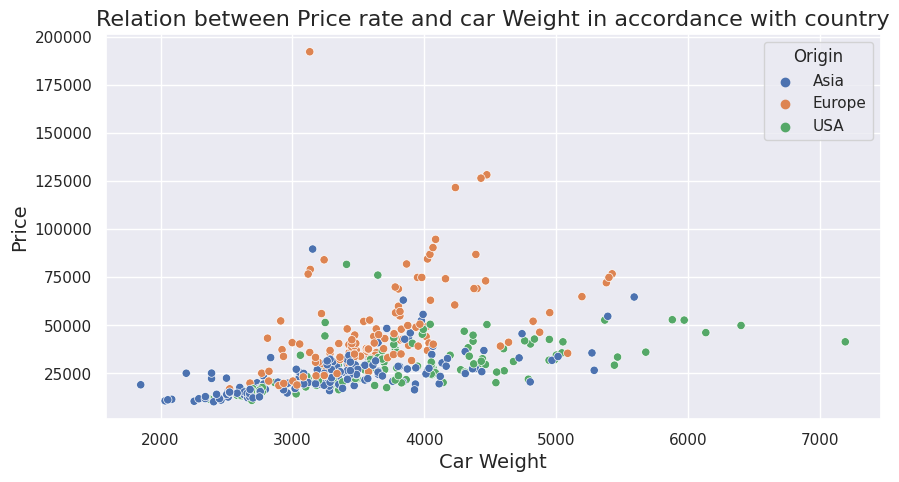

In [22]:
plt.figure(figsize=(10, 5))  
sns.scatterplot(x='Weight', y='MSRP', data=ds_cars, marker= 'o' , hue='Origin')
plt.title('Relation between Price rate and car Weight in accordance with country', fontsize=16)
plt.xlabel('Car Weight', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

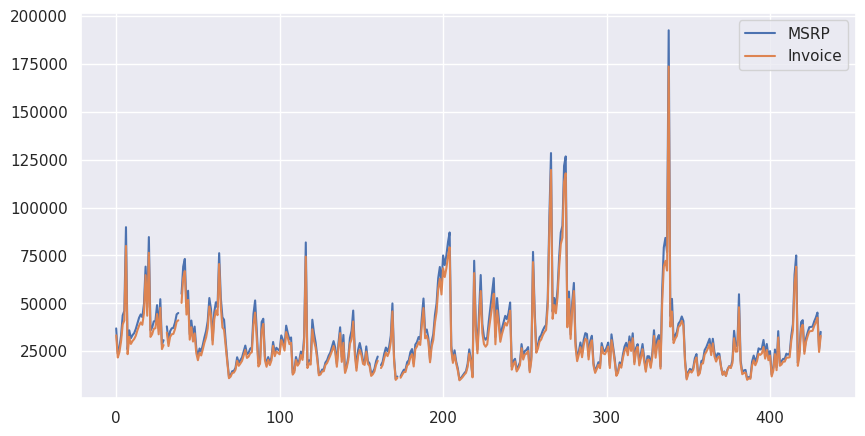

In [23]:
plt.figure(figsize=(10,5))  
plt.plot(ds_cars.index, ds_cars.MSRP, label='MSRP')
plt.plot(ds_cars.index, ds_cars.Invoice, label='Invoice')
plt.legend(loc=0)
plt.show()

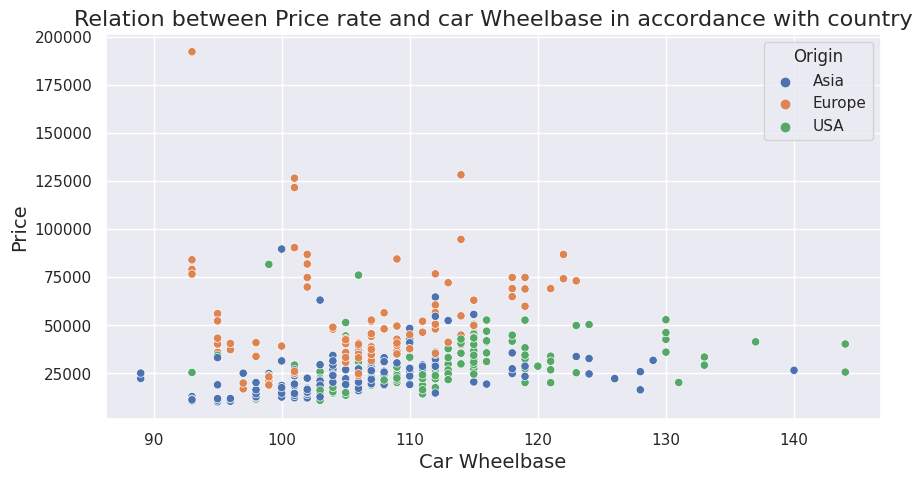

In [24]:
plt.figure(figsize=(10, 5))  
sns.scatterplot(x='Wheelbase', y='MSRP', data=ds_cars, marker= 'o' , hue='Origin')
plt.title('Relation between Price rate and car Wheelbase in accordance with country', fontsize=16)
plt.xlabel('Car Wheelbase', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

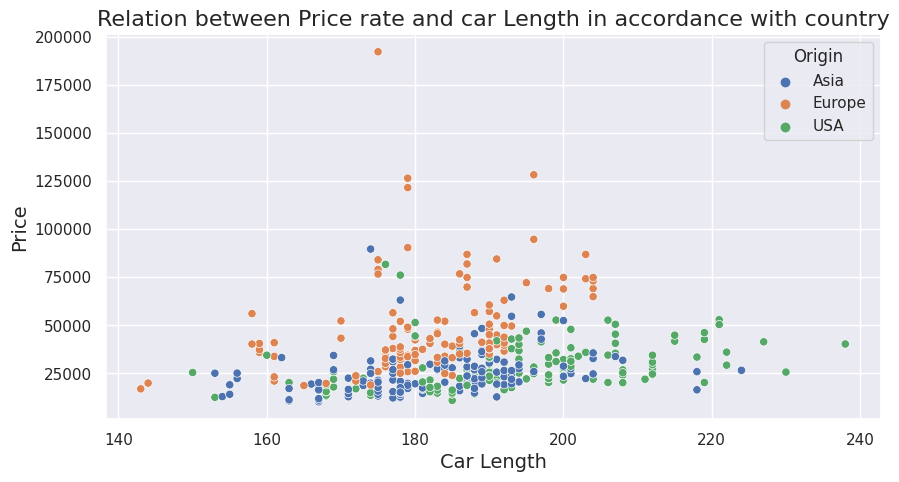

In [25]:
plt.figure(figsize=(10, 5))  
sns.scatterplot(x='Length', y='MSRP', data=ds_cars, marker= 'o' , hue='Origin')
plt.title('Relation between Price rate and car Length in accordance with country', fontsize=16)
plt.xlabel('Car Length', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

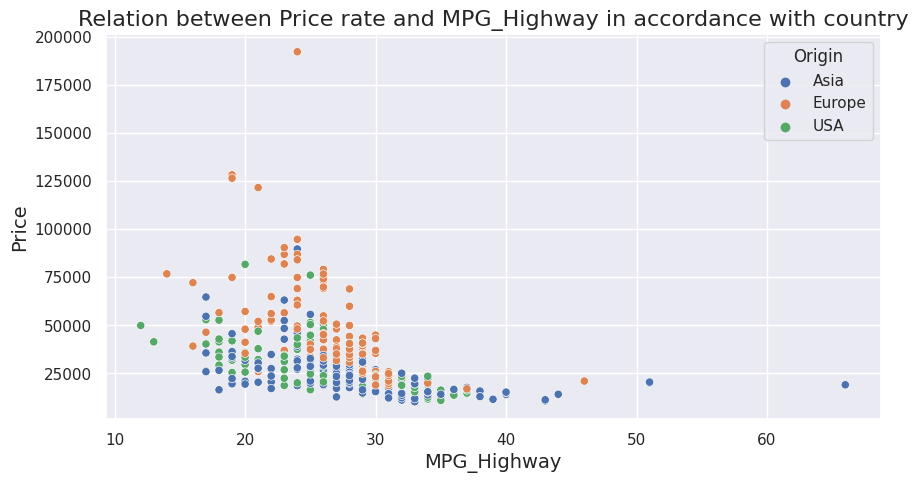

In [26]:
plt.figure(figsize=(10, 5))  
sns.scatterplot(x='MPG_Highway', y='MSRP', data=ds_cars, marker= 'o' , hue='Origin')
plt.title('Relation between Price rate and MPG_Highway in accordance with country', fontsize=16)
plt.xlabel('MPG_Highway', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

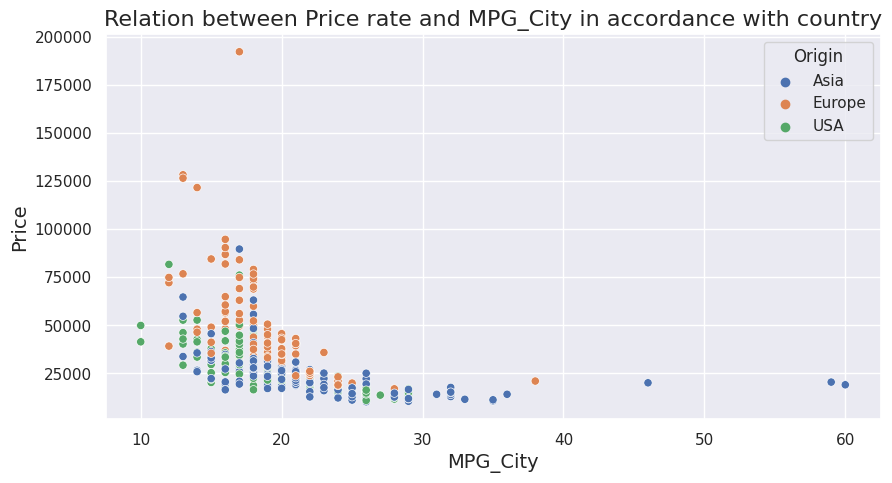

In [27]:
plt.figure(figsize=(10, 5))  
sns.scatterplot(x='MPG_City', y='MSRP', data=ds_cars, marker= 'o' , hue='Origin')
plt.title('Relation between Price rate and MPG_City in accordance with country', fontsize=16)
plt.xlabel('MPG_City', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

# Exploratory data analysis

In [28]:
pd.DataFrame(ds_cars.MSRP.value_counts()).T

MSRP,"33,995.000","21,595.000","29,995.000","28,495.000","23,495.000","21,055.000","74,995.000","15,389.000","23,895.000","13,270.000",...,"35,725.000","31,890.000","22,290.000","17,475.000","14,385.000","33,540.000","22,010.000","37,530.000","29,380.000","35,145.000"
count,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1


In [29]:
pd.DataFrame(ds_cars.Make.value_counts())

,count
Make,
Toyota,28
Chevrolet,27
Mercedes-Benz,26
Ford,23
BMW,20
Audi,19
Honda,17
Nissan,17
Volkswagen,15


In [30]:
pd.DataFrame(ds_cars.Origin.value_counts())

,count
Origin,
Asia,158
USA,147
Europe,123


In [31]:
ds_cars[(ds_cars.Weight > 3577.953)]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"36,945.000","33,337.000",3.500,6.000,265.000,17.000,23.000,"4,451.000",106.000,189.000
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"43,755.000","39,014.000",3.500,6.000,225.000,18.000,24.000,"3,880.000",115.000,197.000
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"46,100.000","41,100.000",3.500,6.000,225.000,18.000,24.000,"3,893.000",115.000,197.000
8,Audi,A41.8T convertible 2dr,Sedan,Europe,Front,"35,940.000","32,506.000",1.800,4.000,170.000,23.000,30.000,"3,638.000",105.000,180.000
10,Audi,A4 3.0 Quattro 4dr manual,Sedan,Europe,All,"33,430.000","30,366.000",3.000,6.000,220.000,17.000,26.000,"3,583.000",104.000,179.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,Volvo,S60 2.5 4dr,Sedan,Europe,All,"31,745.000","29,916.000",2.500,5.000,208.000,20.000,27.000,"3,903.000",107.000,180.000
423,Volvo,S60 T5 4dr,Sedan,Europe,Front,"34,845.000","32,902.000",2.300,5.000,247.000,20.000,28.000,"3,766.000",107.000,180.000
426,Volvo,S80 2.5T 4dr,Sedan,Europe,All,"37,885.000","35,688.000",2.500,5.000,194.000,20.000,27.000,"3,691.000",110.000,190.000
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,"45,210.000","42,573.000",2.900,6.000,268.000,19.000,26.000,"3,653.000",110.000,190.000


In [32]:
ds_cars.groupby(['Make'])[['MSRP','Invoice','Weight','Length','Horsepower','EngineSize','Cylinders']].max().sort_values(by='MSRP', ascending=False)

,MSRP,Invoice,Weight,Length,Horsepower,EngineSize,Cylinders
Make,,,,,,,
Porsche,"192,465.000","173,560.000","4,950.000",188.000,477.000,4.500,8.000
Mercedes-Benz,"128,420.000","119,600.000","5,423.000",203.000,493.000,5.500,12.000
Acura,"89,765.000","79,978.000","4,451.000",197.000,290.000,3.500,6.000
Jaguar,"86,995.000","79,226.000","4,046.000",200.000,390.000,4.200,8.000
Audi,"84,600.000","76,417.000","4,399.000",204.000,450.000,4.200,8.000
Dodge,"81,795.000","74,451.000","4,987.000",219.000,500.000,8.300,10.000
Cadillac,"76,200.000","70,546.000","5,879.000",221.000,345.000,6.000,8.000
Volkswagen,"75,000.000","69,130.000","5,399.000",204.000,420.000,6.000,12.000
BMW,"73,195.000","66,830.000","4,824.000",204.000,333.000,4.400,8.000


In [33]:
ds_cars.groupby(['Origin'])[['MSRP','Invoice','Weight','Length','Horsepower','EngineSize','Cylinders']].max().sort_values(by='MSRP', ascending=False)

,MSRP,Invoice,Weight,Length,Horsepower,EngineSize,Cylinders
Origin,,,,,,,
Europe,"192,465.000","173,560.000","5,423.000",204.000,493.000,6.000,12.000
Asia,"89,765.000","79,978.000","5,590.000",224.000,340.000,5.600,8.000
USA,"81,795.000","74,451.000","7,190.000",238.000,500.000,8.300,10.000


In [34]:
ds_cars[ds_cars.Origin =='Europe']

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
7,Audi,A4 1.8T 4dr,Sedan,Europe,Front,"25,940.000","23,508.000",1.800,4.000,170.000,22.000,31.000,"3,252.000",104.000,179.000
8,Audi,A41.8T convertible 2dr,Sedan,Europe,Front,"35,940.000","32,506.000",1.800,4.000,170.000,23.000,30.000,"3,638.000",105.000,180.000
9,Audi,A4 3.0 4dr,Sedan,Europe,Front,"31,840.000","28,846.000",3.000,6.000,220.000,20.000,28.000,"3,462.000",104.000,179.000
10,Audi,A4 3.0 Quattro 4dr manual,Sedan,Europe,All,"33,430.000","30,366.000",3.000,6.000,220.000,17.000,26.000,"3,583.000",104.000,179.000
11,Audi,A4 3.0 Quattro 4dr auto,Sedan,Europe,All,"34,480.000","31,388.000",3.000,6.000,220.000,18.000,25.000,"3,627.000",104.000,179.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"40,565.000","38,203.000",2.400,5.000,197.000,21.000,28.000,"3,450.000",105.000,186.000
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"42,565.000","40,083.000",2.300,5.000,242.000,20.000,26.000,"3,450.000",105.000,186.000
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,"45,210.000","42,573.000",2.900,6.000,268.000,19.000,26.000,"3,653.000",110.000,190.000
430,Volvo,V40,Wagon,Europe,Front,"26,135.000","24,641.000",1.900,4.000,170.000,22.000,29.000,"2,822.000",101.000,180.000


In [35]:
ds_cars.groupby(['DriveTrain'])[['MSRP','Invoice','Weight','Length','Horsepower','EngineSize','Cylinders']].max().sort_values(by='MSRP', ascending=False)

,MSRP,Invoice,Weight,Length,Horsepower,EngineSize,Cylinders
DriveTrain,,,,,,,
Rear,"192,465.000","173,560.000","4,788.000",230.000,500.000,8.300,12.000
All,"86,970.000","80,939.000","7,190.000",238.000,345.000,6.800,10.000
Front,"84,600.000","76,417.000","5,399.000",219.000,450.000,6.000,12.000


# Find null values

In [36]:
pd.DataFrame(ds_cars.isnull().sum())

,0
Make,4
Model,4
Type,4
Origin,4
DriveTrain,4
MSRP,4
Invoice,4
EngineSize,4
Cylinders,6
Horsepower,4


In [37]:
pd.DataFrame(ds_cars.isnull().sum(axis=1).sort_values(ascending=False)) #Null values by rows

,0
161,15
173,15
39,15
30,15
251,1
...,...
141,0
140,0
139,0
138,0


<Axes: >

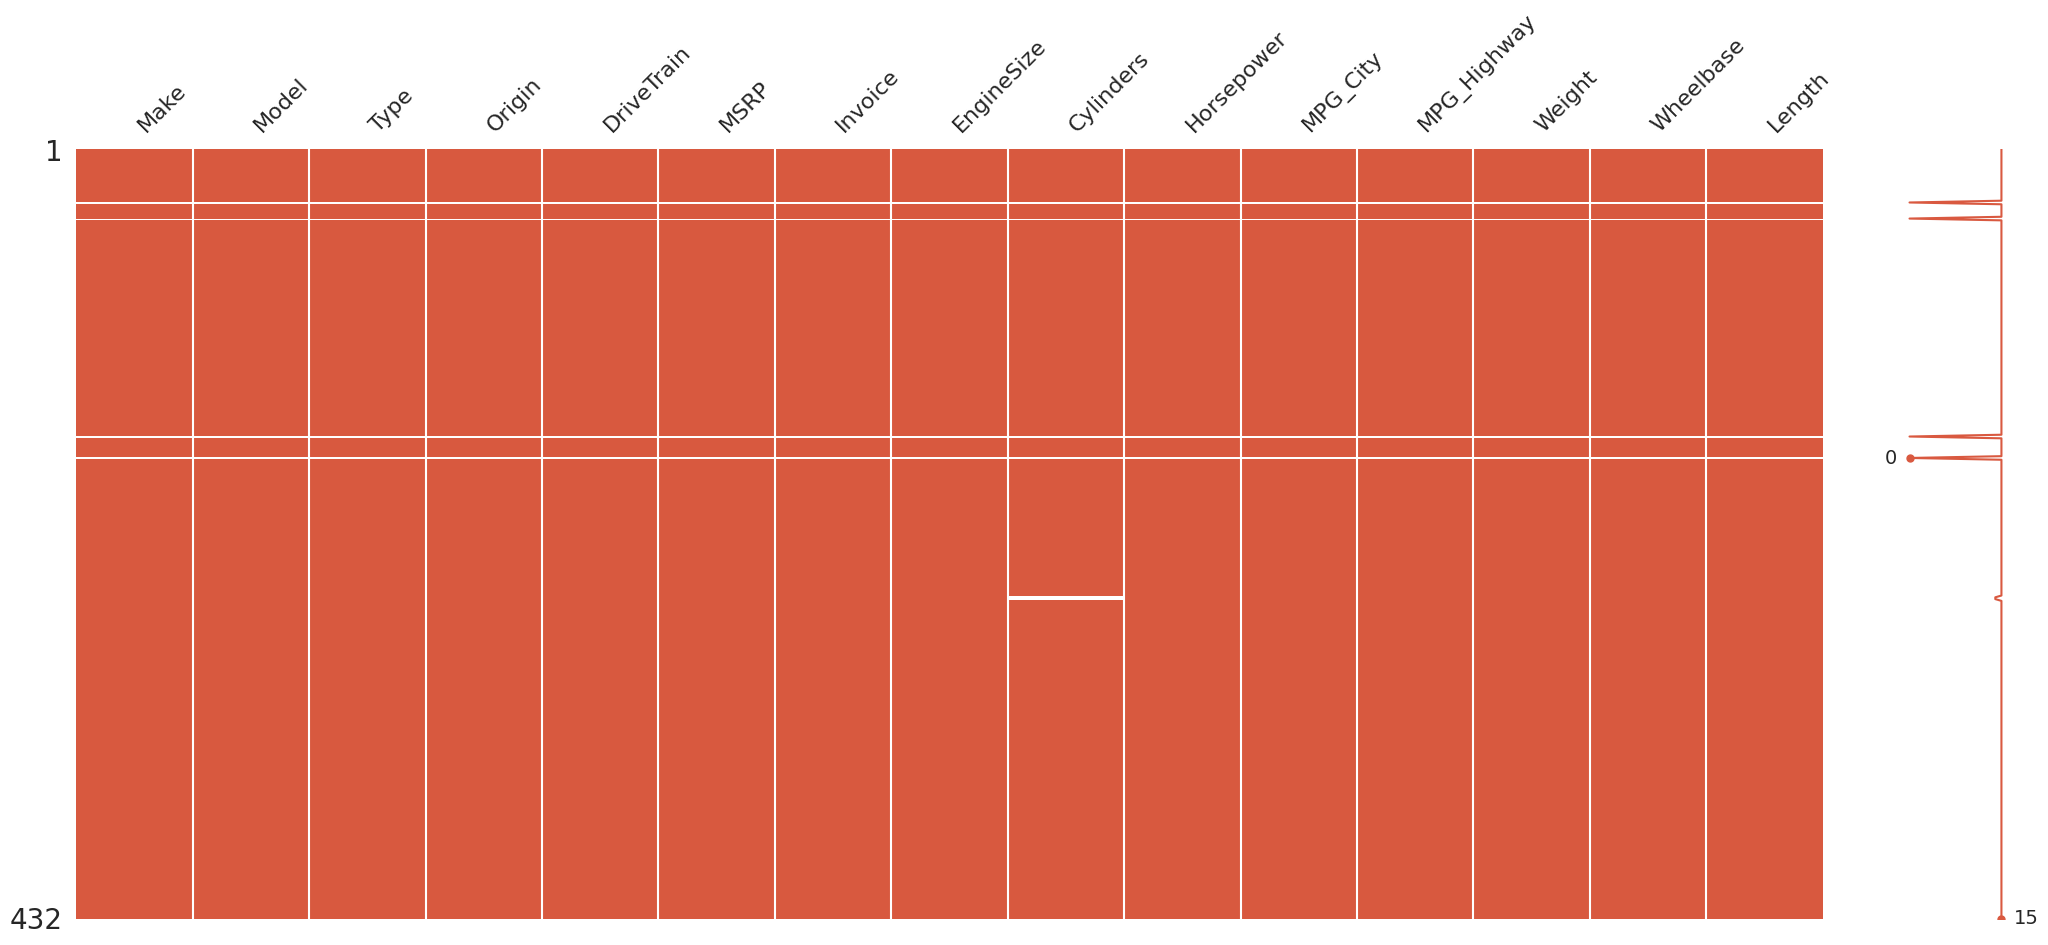

In [38]:
import missingno as msno
msno.matrix(ds_cars, color=(0.85, 0.35, 0.25))

### There are 4 rows have no data for all columns

# Deal with null values

### Drop the 4 rows that have no data for all columns

In [39]:
ds_cars.dropna(subset=["Make"],inplace=True)

In [40]:
pd.DataFrame(ds_cars.isnull().sum())

,0
Make,0
Model,0
Type,0
Origin,0
DriveTrain,0
MSRP,0
Invoice,0
EngineSize,0
Cylinders,2
Horsepower,0


### Fill null values in 'cylinders' column with mean values

In [41]:
ds_cars['Cylinders'].fillna(ds_cars['Cylinders'].mean(), inplace=True)

In [42]:
pd.DataFrame(ds_cars.isnull().sum())

,0
Make,0
Model,0
Type,0
Origin,0
DriveTrain,0
MSRP,0
Invoice,0
EngineSize,0
Cylinders,0
Horsepower,0


### Reset indices after dropping the 4 rows 

In [43]:
ds_cars.reset_index(inplace=True)
ds_cars

,index,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,0,Acura,MDX,SUV,Asia,All,"36,945.000","33,337.000",3.500,6.000,265.000,17.000,23.000,"4,451.000",106.000,189.000
1,1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"23,820.000","21,761.000",2.000,4.000,200.000,24.000,31.000,"2,778.000",101.000,172.000
2,2,Acura,TSX 4dr,Sedan,Asia,Front,"26,990.000","24,647.000",2.400,4.000,200.000,22.000,29.000,"3,230.000",105.000,183.000
3,3,Acura,TL 4dr,Sedan,Asia,Front,"33,195.000","30,299.000",3.200,6.000,270.000,20.000,28.000,"3,575.000",108.000,186.000
4,4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"43,755.000","39,014.000",3.500,6.000,225.000,18.000,24.000,"3,880.000",115.000,197.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"40,565.000","38,203.000",2.400,5.000,197.000,21.000,28.000,"3,450.000",105.000,186.000
424,428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"42,565.000","40,083.000",2.300,5.000,242.000,20.000,26.000,"3,450.000",105.000,186.000
425,429,Volvo,S80 T6 4dr,Sedan,Europe,Front,"45,210.000","42,573.000",2.900,6.000,268.000,19.000,26.000,"3,653.000",110.000,190.000
426,430,Volvo,V40,Wagon,Europe,Front,"26,135.000","24,641.000",1.900,4.000,170.000,22.000,29.000,"2,822.000",101.000,180.000


In [44]:
ds_cars.drop(['index'],axis = 1,inplace=True)
ds_cars

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"36,945.000","33,337.000",3.500,6.000,265.000,17.000,23.000,"4,451.000",106.000,189.000
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"23,820.000","21,761.000",2.000,4.000,200.000,24.000,31.000,"2,778.000",101.000,172.000
2,Acura,TSX 4dr,Sedan,Asia,Front,"26,990.000","24,647.000",2.400,4.000,200.000,22.000,29.000,"3,230.000",105.000,183.000
3,Acura,TL 4dr,Sedan,Asia,Front,"33,195.000","30,299.000",3.200,6.000,270.000,20.000,28.000,"3,575.000",108.000,186.000
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"43,755.000","39,014.000",3.500,6.000,225.000,18.000,24.000,"3,880.000",115.000,197.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"40,565.000","38,203.000",2.400,5.000,197.000,21.000,28.000,"3,450.000",105.000,186.000
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"42,565.000","40,083.000",2.300,5.000,242.000,20.000,26.000,"3,450.000",105.000,186.000
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"45,210.000","42,573.000",2.900,6.000,268.000,19.000,26.000,"3,653.000",110.000,190.000
426,Volvo,V40,Wagon,Europe,Front,"26,135.000","24,641.000",1.900,4.000,170.000,22.000,29.000,"2,822.000",101.000,180.000


# Find Outliers

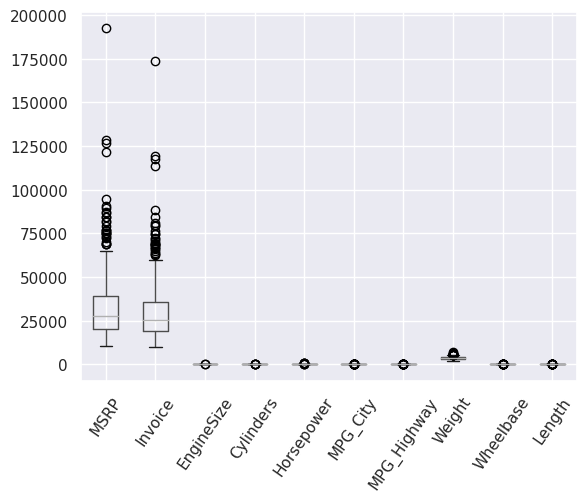

In [45]:
#sns.boxplot(ds_cars)
ds_cars.boxplot()
plt.xticks(rotation=55)
plt.show()

#### Separate columns for clearly see each column outliers

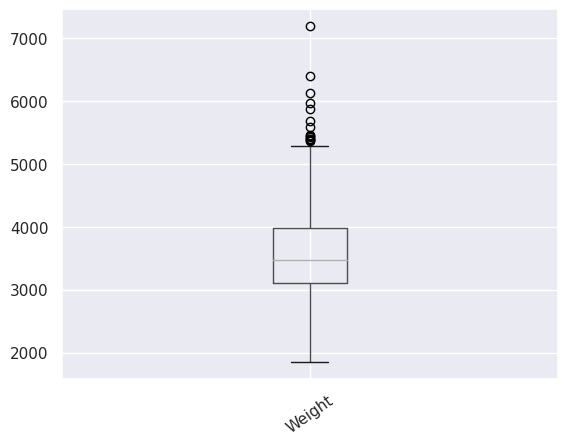

In [46]:
#sns.boxplot(ds_cars['Weight'])
ds_cars.boxplot(['Weight'])
plt.xticks(rotation=35)
plt.show()

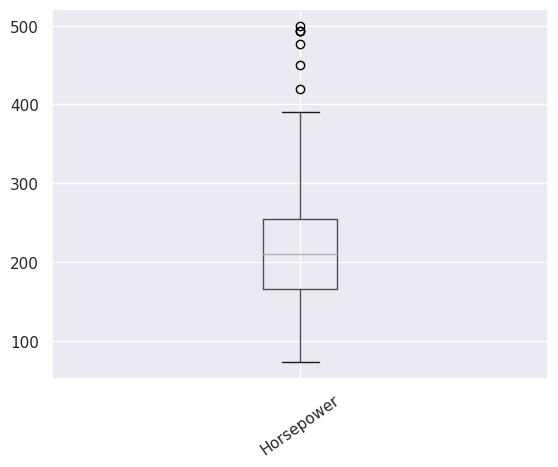

In [47]:
#sns.boxplot(ds_cars['Horsepower'])
ds_cars.boxplot(['Horsepower'])
plt.xticks(rotation=35)
plt.show()

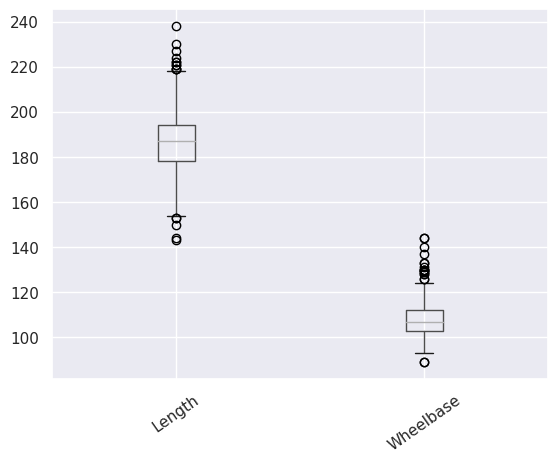

In [48]:
#sns.boxplot(ds_cars[['Length','Wheelbase']])
ds_cars.boxplot(['Length','Wheelbase'])
plt.xticks(rotation=35)
plt.show()

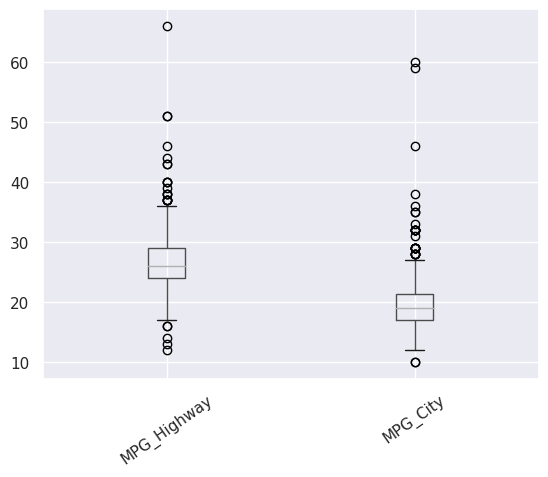

In [49]:
#sns.boxplot(ds_cars[['MPG_Highway','MPG_City']])
ds_cars.boxplot(['MPG_Highway','MPG_City'])
plt.xticks(rotation=35)
plt.show()

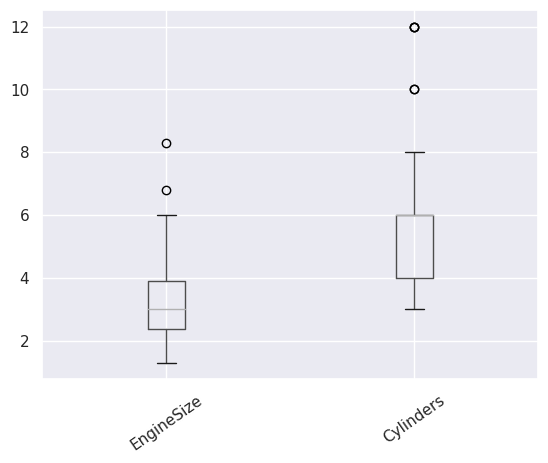

In [50]:
#sns.boxplot(ds_cars[['EngineSize','Cylinders']])
ds_cars.boxplot(['EngineSize','Cylinders'])
plt.xticks(rotation=35)
plt.show()

##### These columns 'MPG_Highway' , 'MPG_City' , 'Length' , 'Wheelbase' , 'Horsepower' , 'Weight' , 'MSRP' , 'Invoice' have outliers

# Feature Engineering

# Dealing with category data

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ds_cars.iloc[:,0] = le.fit_transform(ds_cars.iloc[:,0])
ds_cars.iloc[:,1] = le.fit_transform(ds_cars.iloc[:,1])
ds_cars.iloc[:,2] = le.fit_transform(ds_cars.iloc[:,2])
ds_cars.iloc[:,3] = le.fit_transform(ds_cars.iloc[:,3])
ds_cars.iloc[:,4] = le.fit_transform(ds_cars.iloc[:,4])
ds_cars

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,0,229,1,0,0,"36,945.000","33,337.000",3.500,6.000,265.000,17.000,23.000,"4,451.000",106.000,189.000
1,0,293,2,0,1,"23,820.000","21,761.000",2.000,4.000,200.000,24.000,31.000,"2,778.000",101.000,172.000
2,0,366,2,0,1,"26,990.000","24,647.000",2.400,4.000,200.000,22.000,29.000,"3,230.000",105.000,183.000
3,0,365,2,0,1,"33,195.000","30,299.000",3.200,6.000,270.000,20.000,28.000,"3,575.000",108.000,186.000
4,0,0,2,0,1,"43,755.000","39,014.000",3.500,6.000,225.000,18.000,24.000,"3,880.000",115.000,197.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,37,83,2,1,1,"40,565.000","38,203.000",2.400,5.000,197.000,21.000,28.000,"3,450.000",105.000,186.000
424,37,82,2,1,1,"42,565.000","40,083.000",2.300,5.000,242.000,20.000,26.000,"3,450.000",105.000,186.000
425,37,322,2,1,1,"45,210.000","42,573.000",2.900,6.000,268.000,19.000,26.000,"3,653.000",110.000,190.000
426,37,389,5,1,1,"26,135.000","24,641.000",1.900,4.000,170.000,22.000,29.000,"2,822.000",101.000,180.000


# Correlation between features and target
### use absolute to prevent confusion with negative values

In [52]:
abs(ds_cars.corr())

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
Make,1.000,0.076,0.047,0.379,0.063,0.073,0.066,0.225,0.202,0.143,0.164,0.116,0.156,0.206,0.147
Model,0.076,1.000,0.020,0.087,0.035,0.011,0.009,0.098,0.097,0.035,0.097,0.129,0.113,0.075,0.081
Type,0.047,0.020,1.000,0.014,0.192,0.028,0.028,0.037,0.047,0.043,0.057,0.018,0.118,0.009,0.005
Origin,0.379,0.087,0.014,1.000,0.091,0.089,0.090,0.331,0.252,0.136,0.240,0.167,0.252,0.309,0.324
DriveTrain,0.063,0.035,0.192,0.091,1.000,0.197,0.200,0.047,0.138,0.160,0.046,0.121,0.217,0.060,0.031
MSRP,0.073,0.011,0.028,0.089,0.197,1.000,0.999,0.572,0.650,0.827,0.475,0.440,0.448,0.152,0.172
Invoice,0.066,0.009,0.028,0.090,0.200,0.999,1.000,0.564,0.645,0.824,0.470,0.435,0.442,0.148,0.167
EngineSize,0.225,0.098,0.037,0.331,0.047,0.572,0.564,1.000,0.902,0.787,0.709,0.717,0.808,0.637,0.637
Cylinders,0.202,0.097,0.047,0.252,0.138,0.650,0.645,0.902,1.000,0.810,0.684,0.676,0.741,0.547,0.547
Horsepower,0.143,0.035,0.043,0.136,0.160,0.827,0.824,0.787,0.810,1.000,0.677,0.647,0.631,0.387,0.382


# Visualize correlation between features and target in a Heatmap 
### use absolute to prevent confusion with negative values

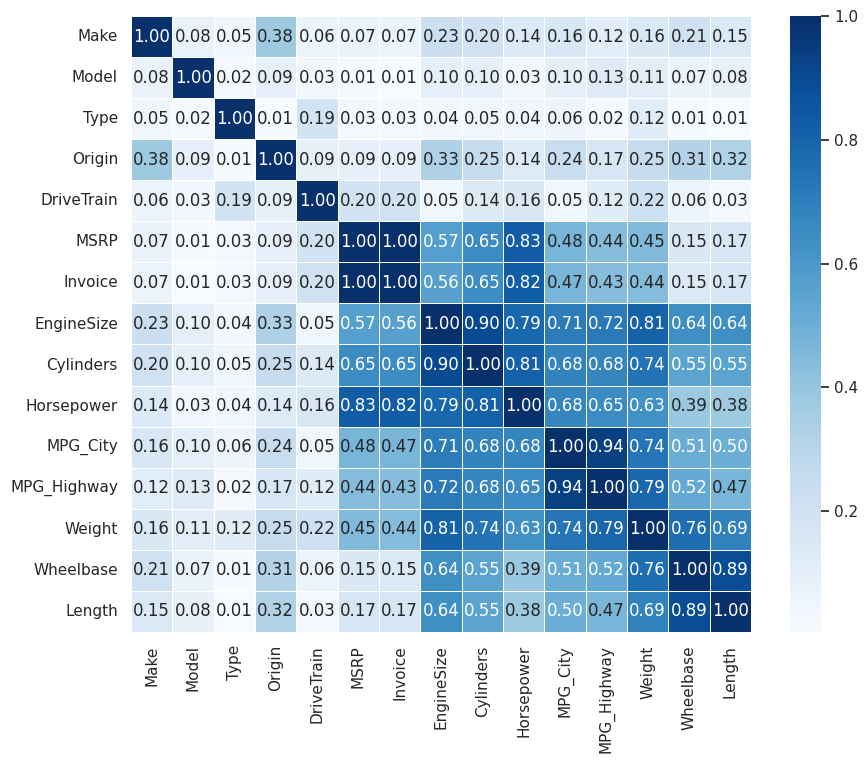

In [53]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(abs(ds_cars.corr()), cbar=True,  annot=True, linewidth=0.5 ,fmt='.2f', cmap='Blues')
plt.show()

### The colors get darker as correlation increases

## Check multicollinearity between features considering the cutt value is 80%

In [54]:
abs(ds_cars.corr())>0.8

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
Make,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Model,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Type,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
Origin,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
DriveTrain,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
MSRP,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False
Invoice,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False
EngineSize,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False
Cylinders,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False
Horsepower,False,False,False,False,False,True,True,False,True,True,False,False,False,False,False


####  'Invoice' 'Horsepower' 'EngineSize' 'Cylinders' 'Weight' 'MPG_City' 'MPG_Highway' 'Wheelbase' 'Length' have multicollinearity

## Visualize the check of multicollinearity between features considering the cutt value is 80%
### use absolute to prevent confusion with negative values

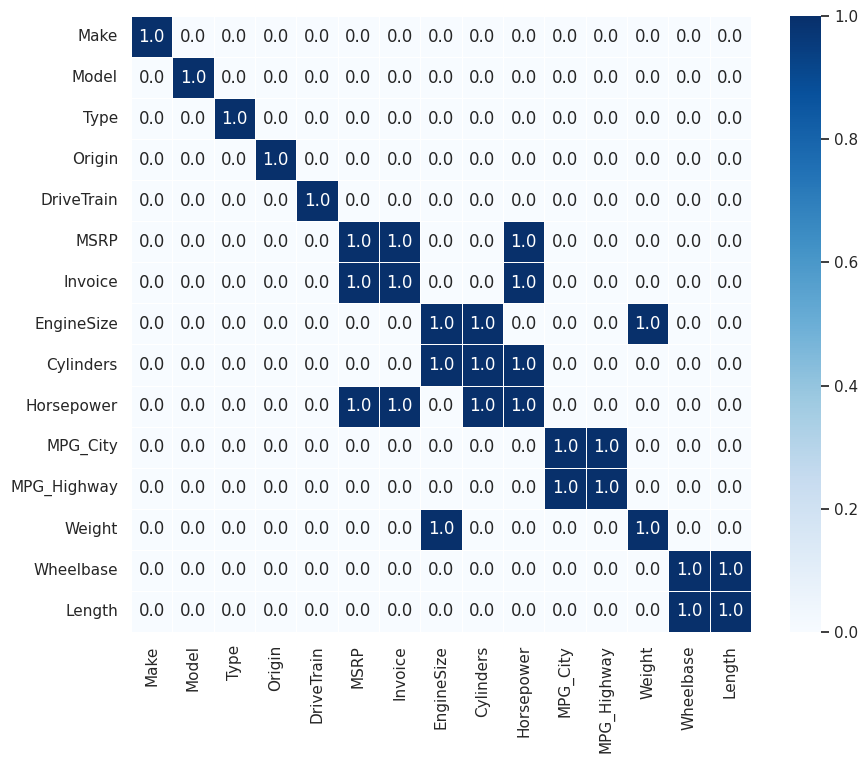

In [55]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(abs(ds_cars.corr())>0.8, cbar=True,  annot=True, linewidth=0.5 ,fmt='.1f', cmap='Blues')
plt.show()

#### - Values 1 refer to True (multicollinearity exist) - 0 refer to False (multicollinearity not exist)

# Correlation between the target and each feature
#### use absolute to prevent confusion with negative values

In [56]:
pd.DataFrame(abs(ds_cars.corr())['MSRP'].sort_values(ascending=False))

,MSRP
MSRP,1.000
Invoice,0.999
Horsepower,0.827
Cylinders,0.650
EngineSize,0.572
MPG_City,0.475
Weight,0.448
MPG_Highway,0.440
DriveTrain,0.197
Length,0.172


#### 'Invoice' 'Horsepower' 'Cylinders' 'EngineSize' 'MPG_City' 'Weight' 'MPG_Highway' are high correlated features with target 'MSRP'

# Deal with outliers 

### 'Invoice' column has outliers and high correlation with target 'MSRP'

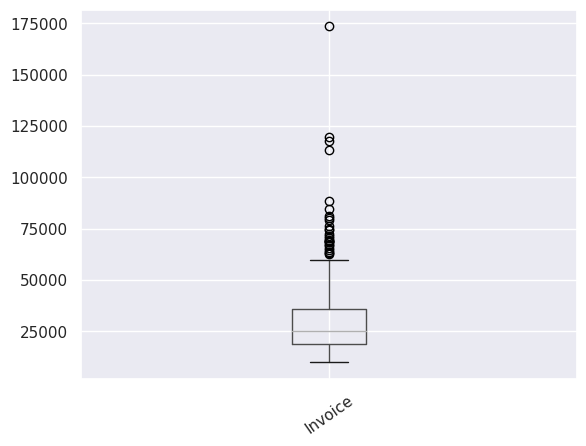

In [57]:
#sns.boxplot(ds_cars['Invoice'])
ds_cars.boxplot(['Invoice'])
plt.xticks(rotation=35)
plt.show()

# Deal with nulls using Z-score

In [58]:
ds_cars['Invoice'].mean(),ds_cars['Invoice'].std()

(30014.70093457944, 17642.11775031476)

In [59]:
threshold = 1.7
INVoutlier = []
for i in ds_cars['Invoice']:
    z = (i-ds_cars['Invoice'].mean())/ds_cars['Invoice'].std()
    #print(z)
    if abs(z) > threshold:
        INVoutlier.append(i)

In [60]:
print('outlier in dataset is', INVoutlier)

outlier in dataset is [79978.0, 64740.0, 76417.0, 63190.0, 66830.0, 70546.0, 74451.0, 62846.0, 68306.0, 63756.0, 68306.0, 74676.0, 79226.0, 65807.0, 71540.0, 88324.0, 119600.0, 69168.0, 80939.0, 84325.0, 113388.0, 117854.0, 69229.0, 72206.0, 67128.0, 173560.0, 69130.0]


In [61]:
pd.DataFrame(INVoutlier).shape

(27, 1)

In [62]:
pd.DataFrame(INVoutlier).max()

0   173,560.000
dtype: float64

In [63]:
pd.DataFrame(INVoutlier).min()

0   62,846.000
dtype: float64

### Outliers from z-score are correlated with the outliers shown in the boxplot

### Get indices of the outliers

In [64]:
INVoutlierIndices = [i for i,j in enumerate(ds_cars['Invoice'].tolist()) if j in INVoutlier]
print(INVoutlierIndices)

[6, 18, 20, 39, 40, 61, 114, 194, 196, 197, 198, 199, 200, 215, 251, 261, 262, 267, 268, 269, 270, 271, 331, 332, 333, 334, 412]


### Get the all data of the outliers in a separate dataframe

In [65]:
INVoutlier = ds_cars.loc[INVoutlierIndices,:]
INVoutlier

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
6,0,256,3,0,2,"89,765.000","79,978.000",3.200,6.000,290.000,17.000,24.000,"3,153.000",100.000,174.000
18,1,44,2,1,0,"69,190.000","64,740.000",4.200,8.000,330.000,17.000,24.000,"4,399.000",121.000,204.000
20,1,292,3,1,1,"84,600.000","76,417.000",4.200,8.000,450.000,15.000,22.000,"4,024.000",109.000,191.000
39,2,20,2,1,2,"69,195.000","63,190.000",4.400,8.000,325.000,18.000,26.000,"4,376.000",118.000,198.000
40,2,19,2,1,2,"73,195.000","66,830.000",4.400,8.000,325.000,18.000,26.000,"4,464.000",123.000,204.000
61,4,413,3,2,2,"76,200.000","70,546.000",4.600,8.000,320.000,17.000,25.000,"3,647.000",106.000,178.000
114,7,395,3,2,2,"81,795.000","74,451.000",8.300,10.000,500.000,12.000,20.000,"3,410.000",99.000,176.000
194,15,391,2,1,2,"68,995.000","62,846.000",4.200,8.000,294.000,18.000,28.000,"3,803.000",119.000,200.000
196,15,407,2,1,2,"74,995.000","68,306.000",4.200,8.000,390.000,17.000,24.000,"3,948.000",119.000,200.000
197,15,409,3,1,2,"69,995.000","63,756.000",4.200,8.000,294.000,18.000,26.000,"3,779.000",102.000,187.000


### Keep 30% of outliers as accepted outliers

In [66]:
INVoutlierAccepted = INVoutlier.sample(frac = 0.3, random_state = 125)
INVoutlierAccepted.shape

(8, 15)

### Remove all outliers from original data

In [67]:
ds_cars.drop(INVoutlierIndices,axis=0,inplace=True)
ds_cars

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,0,229,1,0,0,"36,945.000","33,337.000",3.500,6.000,265.000,17.000,23.000,"4,451.000",106.000,189.000
1,0,293,2,0,1,"23,820.000","21,761.000",2.000,4.000,200.000,24.000,31.000,"2,778.000",101.000,172.000
2,0,366,2,0,1,"26,990.000","24,647.000",2.400,4.000,200.000,22.000,29.000,"3,230.000",105.000,183.000
3,0,365,2,0,1,"33,195.000","30,299.000",3.200,6.000,270.000,20.000,28.000,"3,575.000",108.000,186.000
4,0,0,2,0,1,"43,755.000","39,014.000",3.500,6.000,225.000,18.000,24.000,"3,880.000",115.000,197.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,37,83,2,1,1,"40,565.000","38,203.000",2.400,5.000,197.000,21.000,28.000,"3,450.000",105.000,186.000
424,37,82,2,1,1,"42,565.000","40,083.000",2.300,5.000,242.000,20.000,26.000,"3,450.000",105.000,186.000
425,37,322,2,1,1,"45,210.000","42,573.000",2.900,6.000,268.000,19.000,26.000,"3,653.000",110.000,190.000
426,37,389,5,1,1,"26,135.000","24,641.000",1.900,4.000,170.000,22.000,29.000,"2,822.000",101.000,180.000


### Concatenate the 30% of the accepted outliers with the original data (After removing all outliers)

In [68]:
ds_cars = pd.concat([ds_cars, INVoutlierAccepted], axis=0) 
ds_cars.shape

(409, 15)

### Reset the indices

In [69]:
ds_cars.reset_index(inplace=True)
ds_cars

,index,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,0,0,229,1,0,0,"36,945.000","33,337.000",3.500,6.000,265.000,17.000,23.000,"4,451.000",106.000,189.000
1,1,0,293,2,0,1,"23,820.000","21,761.000",2.000,4.000,200.000,24.000,31.000,"2,778.000",101.000,172.000
2,2,0,366,2,0,1,"26,990.000","24,647.000",2.400,4.000,200.000,22.000,29.000,"3,230.000",105.000,183.000
3,3,0,365,2,0,1,"33,195.000","30,299.000",3.200,6.000,270.000,20.000,28.000,"3,575.000",108.000,186.000
4,4,0,0,2,0,1,"43,755.000","39,014.000",3.500,6.000,225.000,18.000,24.000,"3,880.000",115.000,197.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,269,23,324,3,1,2,"90,520.000","84,325.000",5.000,8.000,302.000,16.000,23.000,"4,065.000",101.000,179.000
405,333,29,31,3,1,2,"76,765.000","67,128.000",3.600,6.000,315.000,18.000,26.000,"3,119.000",93.000,175.000
406,18,1,44,2,1,0,"69,190.000","64,740.000",4.200,8.000,330.000,17.000,24.000,"4,399.000",121.000,204.000
407,261,23,84,2,1,2,"94,820.000","88,324.000",5.000,8.000,302.000,16.000,24.000,"4,085.000",114.000,196.000


In [70]:
ds_cars.drop(['index'],axis = 1,inplace=True)
ds_cars

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,0,229,1,0,0,"36,945.000","33,337.000",3.500,6.000,265.000,17.000,23.000,"4,451.000",106.000,189.000
1,0,293,2,0,1,"23,820.000","21,761.000",2.000,4.000,200.000,24.000,31.000,"2,778.000",101.000,172.000
2,0,366,2,0,1,"26,990.000","24,647.000",2.400,4.000,200.000,22.000,29.000,"3,230.000",105.000,183.000
3,0,365,2,0,1,"33,195.000","30,299.000",3.200,6.000,270.000,20.000,28.000,"3,575.000",108.000,186.000
4,0,0,2,0,1,"43,755.000","39,014.000",3.500,6.000,225.000,18.000,24.000,"3,880.000",115.000,197.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,23,324,3,1,2,"90,520.000","84,325.000",5.000,8.000,302.000,16.000,23.000,"4,065.000",101.000,179.000
405,29,31,3,1,2,"76,765.000","67,128.000",3.600,6.000,315.000,18.000,26.000,"3,119.000",93.000,175.000
406,1,44,2,1,0,"69,190.000","64,740.000",4.200,8.000,330.000,17.000,24.000,"4,399.000",121.000,204.000
407,23,84,2,1,2,"94,820.000","88,324.000",5.000,8.000,302.000,16.000,24.000,"4,085.000",114.000,196.000


# Split data into features and target

In [71]:
X = ds_cars.drop(['MSRP'], inplace=False, axis=1)
X

,Make,Model,Type,Origin,DriveTrain,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,0,229,1,0,0,"33,337.000",3.500,6.000,265.000,17.000,23.000,"4,451.000",106.000,189.000
1,0,293,2,0,1,"21,761.000",2.000,4.000,200.000,24.000,31.000,"2,778.000",101.000,172.000
2,0,366,2,0,1,"24,647.000",2.400,4.000,200.000,22.000,29.000,"3,230.000",105.000,183.000
3,0,365,2,0,1,"30,299.000",3.200,6.000,270.000,20.000,28.000,"3,575.000",108.000,186.000
4,0,0,2,0,1,"39,014.000",3.500,6.000,225.000,18.000,24.000,"3,880.000",115.000,197.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,23,324,3,1,2,"84,325.000",5.000,8.000,302.000,16.000,23.000,"4,065.000",101.000,179.000
405,29,31,3,1,2,"67,128.000",3.600,6.000,315.000,18.000,26.000,"3,119.000",93.000,175.000
406,1,44,2,1,0,"64,740.000",4.200,8.000,330.000,17.000,24.000,"4,399.000",121.000,204.000
407,23,84,2,1,2,"88,324.000",5.000,8.000,302.000,16.000,24.000,"4,085.000",114.000,196.000


In [72]:
y = ds_cars['MSRP']
y

0      36,945.000
1      23,820.000
2      26,990.000
3      33,195.000
4      43,755.000
          ...    
404    90,520.000
405    76,765.000
406    69,190.000
407    94,820.000
408   192,465.000
Name: MSRP, Length: 409, dtype: float64

# Feature Selection

In [73]:
from sklearn.feature_selection import SelectPercentile, chi2, f_regression
FS = SelectPercentile(score_func =f_regression, percentile=90)
X_new = FS.fit_transform(X, y)

In [74]:
pd.DataFrame(X_new).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,"33,337.000",3.500,6.000,265.000,17.000,23.000,"4,451.000",106.000,189.000
1,0,0,1,"21,761.000",2.000,4.000,200.000,24.000,31.000,"2,778.000",101.000,172.000
2,0,0,1,"24,647.000",2.400,4.000,200.000,22.000,29.000,"3,230.000",105.000,183.000


In [75]:
X.head(3)

,Make,Model,Type,Origin,DriveTrain,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,0,229,1,0,0,"33,337.000",3.500,6.000,265.000,17.000,23.000,"4,451.000",106.000,189.000
1,0,293,2,0,1,"21,761.000",2.000,4.000,200.000,24.000,31.000,"2,778.000",101.000,172.000
2,0,366,2,0,1,"24,647.000",2.400,4.000,200.000,22.000,29.000,"3,230.000",105.000,183.000


In [76]:
X = pd.DataFrame(X_new, columns= [i for i,j in zip(X.columns, FS.get_support()) if j])
X

,Make,Origin,DriveTrain,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,0,0,0,"33,337.000",3.500,6.000,265.000,17.000,23.000,"4,451.000",106.000,189.000
1,0,0,1,"21,761.000",2.000,4.000,200.000,24.000,31.000,"2,778.000",101.000,172.000
2,0,0,1,"24,647.000",2.400,4.000,200.000,22.000,29.000,"3,230.000",105.000,183.000
3,0,0,1,"30,299.000",3.200,6.000,270.000,20.000,28.000,"3,575.000",108.000,186.000
4,0,0,1,"39,014.000",3.500,6.000,225.000,18.000,24.000,"3,880.000",115.000,197.000
...,...,...,...,...,...,...,...,...,...,...,...,...
404,23,1,2,"84,325.000",5.000,8.000,302.000,16.000,23.000,"4,065.000",101.000,179.000
405,29,1,2,"67,128.000",3.600,6.000,315.000,18.000,26.000,"3,119.000",93.000,175.000
406,1,1,0,"64,740.000",4.200,8.000,330.000,17.000,24.000,"4,399.000",121.000,204.000
407,23,1,2,"88,324.000",5.000,8.000,302.000,16.000,24.000,"4,085.000",114.000,196.000


# Split data into train and test data

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, shuffle=True)

In [78]:
pd.DataFrame(X_train)

,Make,Origin,DriveTrain,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
262,24,2,1,"30,846.000",4.200,6.000,201.000,16.000,23.000,"4,340.000",121.000,202.000
394,37,1,1,"35,542.000",2.900,6.000,208.000,20.000,28.000,"3,576.000",110.000,190.000
75,5,2,1,"24,518.000",3.400,6.000,185.000,19.000,26.000,"3,699.000",112.000,187.000
113,8,2,0,"26,983.000",4.000,6.000,210.000,15.000,20.000,"4,463.000",114.000,190.000
116,8,2,1,"12,906.000",2.000,4.000,110.000,27.000,36.000,"2,606.000",103.000,168.000
...,...,...,...,...,...,...,...,...,...,...,...,...
71,5,2,1,"25,672.000",3.800,6.000,240.000,18.000,28.000,"3,606.000",111.000,200.000
106,7,2,1,"20,508.000",2.400,4.000,150.000,20.000,26.000,"3,862.000",113.000,189.000
270,25,0,1,"16,196.000",2.000,4.000,120.000,25.000,31.000,"2,744.000",102.000,181.000
348,35,0,0,"31,827.000",4.700,8.000,240.000,14.000,17.000,"5,270.000",118.000,204.000


In [79]:
pd.DataFrame(y_train)

,MSRP
262,"33,995.000"
394,"37,730.000"
75,"27,020.000"
113,"29,670.000"
116,"13,730.000"
...,...
71,"27,995.000"
106,"21,795.000"
270,"17,232.000"
348,"35,695.000"


In [80]:
pd.DataFrame(X_test)

,Make,Origin,DriveTrain,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
172,13,0,2,"26,157.000",3.500,6.000,260.000,18.000,26.000,"3,336.000",112.000,187.000
137,9,2,2,"23,215.000",4.300,6.000,190.000,16.000,20.000,"4,309.000",111.000,190.000
126,8,2,2,"16,943.000",3.800,6.000,193.000,20.000,29.000,"3,290.000",101.000,183.000
94,6,2,1,"28,613.000",2.700,6.000,200.000,21.000,28.000,"3,448.000",106.000,194.000
72,5,2,1,"21,551.000",3.500,6.000,200.000,23.000,32.000,"3,315.000",106.000,188.000
...,...,...,...,...,...,...,...,...,...,...,...,...
124,8,2,2,"27,756.000",4.600,8.000,239.000,17.000,25.000,"4,057.000",115.000,212.000
225,21,1,1,"18,137.000",1.600,4.000,163.000,25.000,34.000,"2,678.000",97.000,144.000
202,18,1,0,"35,777.000",4.600,8.000,217.000,12.000,16.000,"4,576.000",100.000,185.000
380,36,1,1,"21,686.000",2.800,6.000,200.000,21.000,30.000,"3,179.000",99.000,172.000


In [81]:
pd.DataFrame(y_test)

,MSRP
172,"28,495.000"
137,"25,640.000"
126,"18,345.000"
94,"30,950.000"
72,"23,495.000"
...,...
124,"30,315.000"
225,"19,999.000"
202,"39,250.000"
380,"23,785.000"


# Regression machine learning models

# Linear regression

In [82]:
from sklearn import linear_model
linregressor = linear_model.LinearRegression()
linregressor.fit(X_train, y_train)

LinearRegression()

## Model prediction

In [83]:
y_predict_lr = linregressor.predict(X_test)
pd.DataFrame(y_predict_lr, columns = ['MSRP'])

,MSRP
0,"28,565.442"
1,"25,621.477"
2,"18,552.784"
3,"31,246.450"
4,"23,562.092"
...,...
98,"30,686.856"
99,"19,129.626"
100,"39,858.027"
101,"23,373.621"


## Evaluate the model

In [84]:
print("score_test=", linregressor.score(X_test , y_test)*100)
print("score_train=", linregressor.score(X_train , y_train)*100)
print("mean_squared_error=", metrics.mean_squared_error(y_test, y_predict_lr))
print("mean_absolute_error=", metrics.mean_absolute_error(y_test, y_predict_lr))
print("r2_score=", metrics.r2_score(y_test, y_predict_lr))

score_test= 99.74992629483017
score_train= 99.84276217187669
mean_squared_error= 479680.70453989663
mean_absolute_error= 431.4048007532013
r2_score= 0.9974992629483017


In [85]:
print("\n".join("{}         {}".format(x, y) for x, y in zip(y_test[:10], y_predict_lr[:10])))

28495.0         28565.442084874318
25640.0         25621.47707315356
18345.0         18552.784166890462
30950.0         31246.45033364969
23495.0         23562.092066577497
44295.0         44477.5380169026
21055.0         20802.347033401977
50470.0         50885.47215165
12884.0         13529.701715749508
15500.0         15550.234972241586


## Accuracy of the model is perfect

# Lasso regression

In [86]:
LassoRegressionModel = linear_model.Lasso(alpha=0.4, random_state= 125)
LassoRegressionModel.fit(X_train, y_train)

Lasso(alpha=0.4, random_state=125)

## Model prediction

In [87]:
y_predict_la = LassoRegressionModel.predict(X_test)
pd.DataFrame(y_predict_la, columns = ['MSRP'])

,MSRP
0,"28,563.938"
1,"25,619.579"
2,"18,550.763"
3,"31,248.058"
4,"23,561.620"
...,...
98,"30,685.358"
99,"19,130.784"
100,"39,856.522"
101,"23,373.876"


## Evaluate the model

In [88]:
print("score_test=", LassoRegressionModel.score(X_test , y_test)*100)
print("score_train=", LassoRegressionModel.score(X_train , y_train)*100)
print("mean_squared_error=", metrics.mean_squared_error(y_test, y_predict_la))
print("mean_absolute_error=", metrics.mean_absolute_error(y_test, y_predict_la))
print("r2_score=", metrics.r2_score(y_test, y_predict_la))

score_test= 99.74987133704923
score_train= 99.84276162054489
mean_squared_error= 479786.12220890203
mean_absolute_error= 431.3173767413444
r2_score= 0.9974987133704923


In [89]:
print("\n".join("{}         {}".format(x, y) for x, y in zip(y_test[:10], y_predict_la[:10])))

28495.0         28563.938374796195
25640.0         25619.579453863087
18345.0         18550.762914263138
30950.0         31248.058373810498
23495.0         23561.61970726324
44295.0         44476.83834655338
21055.0         20803.43153986892
50470.0         50884.41790577567
12884.0         13528.7629193053
15500.0         15549.625372562661


## Accuracy of the model is perfect

# Decision Tree Regression

In [90]:
from sklearn.tree import DecisionTreeRegressor
dectreeregressor = DecisionTreeRegressor(max_depth=10,random_state=42,min_samples_split=2)
dectreeregressor.fit(X, y)

DecisionTreeRegressor(max_depth=10, random_state=42)

## Model prediction

In [91]:
y_predict_dt = dectreeregressor.predict(X_test)
pd.DataFrame(y_predict_dt, columns = ['MSRP'])

,MSRP
0,"28,495.000"
1,"25,640.000"
2,"18,345.000"
3,"30,950.000"
4,"23,495.000"
...,...
98,"30,315.000"
99,"19,999.000"
100,"39,226.667"
101,"23,777.000"


## Evaluate the model

In [92]:
print("score_test=", dectreeregressor.score(X_test , y_test)*100)
print("score_train=", dectreeregressor.score(X_train , y_train)*100)
print("mean_squared_error=", metrics.mean_squared_error(y_test, y_predict_dt))
print("mean_absolute_error=", metrics.mean_absolute_error(y_test, y_predict_dt))
print("r2_score=", metrics.r2_score(y_test, y_predict_dt))

score_test= 99.99794586590133
score_train= 99.99850752587976
mean_squared_error= 3940.1523282991693
mean_absolute_error= 26.2421790722762
r2_score= 0.9999794586590133


In [93]:
print("\n".join("{}         {}".format(x, y) for x, y in zip(y_test[:10], y_predict_dt[:10])))

28495.0         28495.0
25640.0         25640.0
18345.0         18345.0
30950.0         30950.0
23495.0         23495.0
44295.0         44267.5
21055.0         21055.0
50470.0         50470.0
12884.0         12884.0
15500.0         15497.5


## Accuracy of the model is perfect

# Random Forest Regression

In [94]:
from sklearn.ensemble import RandomForestRegressor
randforestregressor = RandomForestRegressor(n_estimators=200,max_depth=10,random_state=42 ,min_samples_split=2)
randforestregressor.fit(X, y)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

## Model prediction

In [95]:
y_predict_rf = randforestregressor.predict(X_test)
pd.DataFrame(y_predict_rf, columns = ['MSRP'])

,MSRP
0,"28,534.572"
1,"25,548.439"
2,"18,205.015"
3,"31,177.491"
4,"23,596.418"
...,...
98,"30,215.034"
99,"19,889.581"
100,"39,174.617"
101,"23,691.786"


## Evaluate the model

In [96]:
print("score_test=", randforestregressor.score(X_test , y_test)*100)
print("score_train=", randforestregressor.score(X_train , y_train)*100)
print("mean_squared_error=", metrics.mean_squared_error(y_test, y_predict_rf))
print("mean_absolute_error=", metrics.mean_absolute_error(y_test, y_predict_rf))
print("r2_score=", metrics.r2_score(y_test, y_predict_rf))

score_test= 99.45348615017899
score_train= 98.07962088005581
mean_squared_error= 1048299.5337111382
mean_absolute_error= 305.65931952729034
r2_score= 0.9945348615017899


In [97]:
print("\n".join("{}         {}".format(x, y) for x, y in zip(y_test[:10], y_predict_rf[:10])))

28495.0         28534.571904761906
25640.0         25548.439154220778
18345.0         18205.015
30950.0         31177.491224747468
23495.0         23596.417523809523
44295.0         44304.99875
21055.0         21111.086428571427
50470.0         50877.18833333333
12884.0         13158.343333333332
15500.0         15539.689426490178


## Accuracy of the model is perfect

### Support Vector Regression (SVR)

In [98]:
from sklearn.svm import SVR
svregressor = SVR(kernel='linear', C=2.0, epsilon=0.2)
svregressor.fit(X, y)

SVR(C=2.0, epsilon=0.2, kernel='linear')

## Model prediction

In [99]:
y_predict_svr = svregressor.predict(X_test)
pd.DataFrame(y_predict_svr, columns = ['MSRP'])

,MSRP
0,"28,463.291"
1,"25,436.062"
2,"18,366.267"
3,"31,373.208"
4,"23,532.048"
...,...
98,"30,524.918"
99,"19,387.745"
100,"39,288.315"
101,"23,350.611"


## Evaluate the model

In [100]:
print("score_test=", svregressor.score(X_test , y_test)*100)
print("score_train=", svregressor.score(X_train , y_train)*100)
print("mean_squared_error=", metrics.mean_squared_error(y_test, y_predict_svr))
print("mean_absolute_error=", metrics.mean_absolute_error(y_test, y_predict_svr))
print("r2_score=", metrics.r2_score(y_test, y_predict_svr))

score_test= 99.73115256645137
score_train= 99.82613886834369
mean_squared_error= 515691.6687852908
mean_absolute_error= 454.02344871971763
r2_score= 0.9973115256645136


In [101]:
print("\n".join("{}         {}".format(x, y) for x, y in zip(y_test[:10], y_predict_svr[:10])))

28495.0         28463.29075789559
25640.0         25436.062004805684
18345.0         18366.26666903603
30950.0         31373.2078759681
23495.0         23532.04839396584
44295.0         44614.013681174394
21055.0         21034.29101252663
50470.0         51055.73232817757
12884.0         13405.56082606423
15500.0         15561.870819808126


## Accuracy of the model is perfect

# Voting Regressor

In [102]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor

In [103]:
GBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.5, n_estimators=200, max_depth=10)
KNN = KNeighborsRegressor(n_neighbors=6)
RidgeRegressionModel = linear_model.Ridge(alpha=1, random_state= 67)

In [104]:
VotingRegressorModel = VotingRegressor([('GBR', GBR), ('KNN', KNN), ('RRM',RidgeRegressionModel)])
VotingRegressorModel.fit(X, y)

VotingRegressor(estimators=[('GBR',
                             GradientBoostingRegressor(learning_rate=0.5,
                                                       max_depth=10,
                                                       n_estimators=200)),
                            ('KNN', KNeighborsRegressor(n_neighbors=6)),
                            ('RRM', Ridge(alpha=1, random_state=67))])

## Model prediction

In [105]:
y_predict_vtr = VotingRegressorModel.predict(X_test)
pd.DataFrame(y_predict_vtr, columns = ['MSRP'])

,MSRP
0,"28,448.435"
1,"25,437.262"
2,"18,309.009"
3,"31,361.453"
4,"23,585.928"
...,...
98,"30,339.498"
99,"19,604.204"
100,"39,554.065"
101,"23,572.593"


## Evaluate the model

In [106]:
print("score_test=", VotingRegressorModel.score(X_test , y_test)*100)
print("score_train=", VotingRegressorModel.score(X_train , y_train)*100)
print("mean_squared_error=", metrics.mean_squared_error(y_test, y_predict_vtr))
print("mean_absolute_error=", metrics.mean_absolute_error(y_test, y_predict_vtr))
print("r2_score=", metrics.r2_score(y_test, y_predict_vtr))

score_test= 99.88635249652347
score_train= 98.71785320762856
mean_squared_error= 217993.78907031706
mean_absolute_error= 285.9875102495899
r2_score= 0.9988635249652347


In [107]:
print("\n".join("{}         {}".format(x, y) for x, y in zip(y_test[:10], y_predict_vtr[:10])))

28495.0         28448.435274627685
25640.0         25437.2616476163
18345.0         18309.00879013765
30950.0         31361.45261811677
23495.0         23585.927793063383
44295.0         44257.7742996818
21055.0         21075.32905450332
50470.0         50636.15801417714
12884.0         13315.68079716468
15500.0         15494.75473083072


## Accuracy of the model is perfect
